Idea from https://towardsdatascience.com/price-impact-of-order-book-imbalance-in-cryptocurrency-markets-bf39695246f6

### Data Preprosessing

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('/content/drive/MyDrive/WQU-Capstone-HFT/Dataset/Kaiko/L3_OrderBooks_Extract/L5Book.csv')
data = data[(data.bid_1_price != 0) & (data.ask_1_price != 0)].reset_index(drop=True)
data = data.replace({0:np.nan}) 
data.timestamp = pd.to_datetime(data.timestamp)
data.index = data.timestamp
data

,timestamp,bid_1_price,bid_1_vol,bid_2_price,bid_2_vol,bid_3_price,bid_3_vol,bid_4_price,bid_4_vol,bid_5_price,bid_5_vol,ask_1_price,ask_1_vol,ask_2_price,ask_2_vol,ask_3_price,ask_3_vol,ask_4_price,ask_4_vol,ask_5_price,ask_5_vol
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:00.022,9340.7,0.054265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9347.9,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:01.801,9341.6,0.048277,9341.3,0.023495,9340.2,0.500000,NaN,NaN,NaN,NaN,9347.2,-0.200000,9347.8,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.373,2020-06-15 00:00:02.373,9343.0,5.507224,9341.6,0.048277,9341.3,0.023495,9340.2,0.500,9340.183125,0.001282,9347.2,-0.200000,9347.8,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.746,2020-06-15 00:00:02.746,9343.0,5.504334,9341.6,0.048277,9341.4,0.023495,9340.2,0.500,9340.183125,0.001282,9347.2,-0.200000,9347.8,-0.030770,9349.4,-0.017508,NaN,NaN,NaN,NaN
2020-06-15 00:00:03.348,2020-06-15 00:00:03.348,9343.0,5.504334,9341.6,0.048277,9341.4,0.023495,9340.2,0.500,9340.183125,0.001282,9347.0,-0.023495,9347.2,-0.200000,9347.8,-0.030770,9349.400000,-0.017508,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15 23:59:59.588,2020-06-15 23:59:59.588,9434.7,1.100001,9434.6,0.200000,9434.5,1.185000,9434.4,0.200,9434.000000,0.018552,9434.8,-0.001745,9434.9,-0.000948,9435.0,-0.788053,9438.200000,-0.900000,9438.700000,-0.009856
2020-06-15 23:59:59.658,2020-06-15 23:59:59.658,9434.7,1.100001,9434.6,0.200000,9434.5,1.185000,9434.4,0.200,9434.000000,0.018552,9435.0,-0.744685,9438.2,-0.900000,9438.8,-0.009856,9439.100000,-0.005297,9439.189927,-1.150000
2020-06-15 23:59:59.742,2020-06-15 23:59:59.742,9434.8,0.020324,9434.7,1.098229,9434.6,0.200000,9434.5,1.185,9434.400000,0.200000,9435.0,-0.744685,9438.7,-0.900000,9439.1,-0.015153,9439.189927,-1.150000,9439.700000,-0.200000


In [8]:
obi = pd.DataFrame(data.timestamp)
obi['level_1'] = (data.bid_1_vol + data.ask_1_vol)/(data.bid_1_vol + data.ask_1_vol.abs())
obi['level_2'] = (data.bid_1_vol + data.bid_2_vol + data.ask_1_vol + data.ask_2_vol)/(data.bid_1_vol + \
                  data.bid_2_vol + data.ask_1_vol.abs() + data.ask_2_vol.abs())
obi['level_3'] = (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.ask_1_vol + data.ask_2_vol + data.ask_3_vol)/ \
                  (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.ask_1_vol.abs() + data.ask_2_vol.abs() \
                  + data.ask_3_vol.abs())
obi['level_4'] = (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + \
                  data.ask_1_vol + data.ask_2_vol + data.ask_3_vol + data.ask_4_vol)/ \
                  (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + \
                   data.ask_1_vol.abs() + data.ask_2_vol.abs() + data.ask_3_vol.abs() + data.ask_4_vol.abs())
obi['level_5'] = (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + data.bid_5_vol + \
                  data.ask_1_vol + data.ask_2_vol + data.ask_3_vol + data.ask_4_vol + data.ask_5_vol)/ \
                  (data.bid_1_vol + data.bid_2_vol + data.bid_3_vol + data.bid_4_vol + data.bid_5_vol + \
                   data.ask_1_vol.abs() + data.ask_2_vol.abs() + data.ask_3_vol.abs() + data.ask_4_vol.abs() + data.ask_5_vol.abs())                             

### Plot distribution

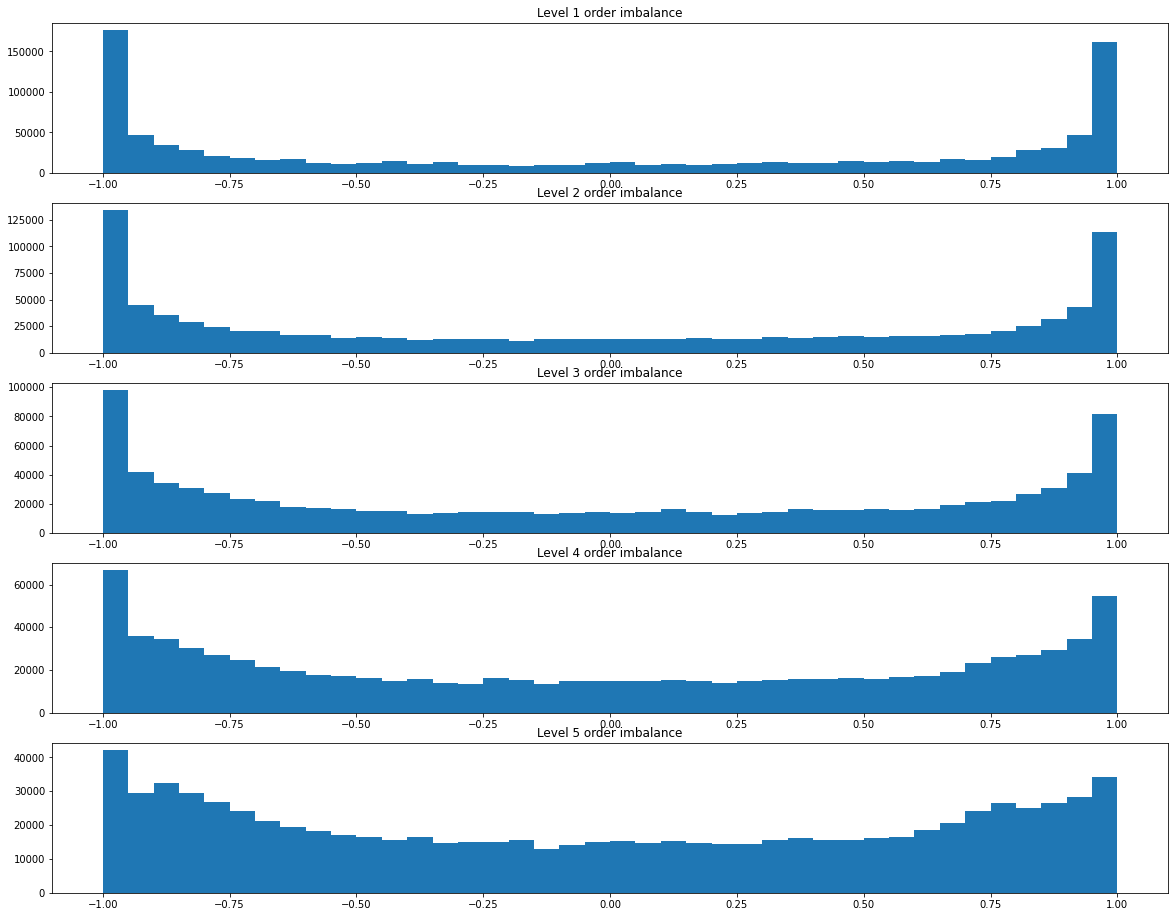

In [9]:
fig = plt.figure(figsize=(20,16))
# fig.suptitle('Order Imbalance subplots', fontsize=14, fontweight='bold')
for i in range(1,6):
  ax = fig.add_subplot(5, 1, i)
  ax.title.set_text(f'Level {i} order imbalance')
  ax.hist(obi[f'level_{i}'], bins=np.linspace(-1, 1, 41))
plt.show()

### Log return processing

In [10]:
price = data[['bid_1_price','ask_1_price']]
price['timestamp_sec_ceil'] = data.index.ceil(freq='1s')
price = price[['timestamp_sec_ceil','bid_1_price','ask_1_price']]
price = price.drop_duplicates(subset= ['timestamp_sec_ceil'],keep='last')
price = price.set_index('timestamp_sec_ceil')
price[:30]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bid_1_price,ask_1_price
timestamp_sec_ceil,,
2020-06-15 00:00:01,9340.7,9347.900000
2020-06-15 00:00:02,9341.6,9347.200000
2020-06-15 00:00:03,9343.0,9347.200000
2020-06-15 00:00:04,9343.0,9347.000000
2020-06-15 00:00:05,9343.0,9346.900000
2020-06-15 00:00:06,9343.0,9347.000000
2020-06-15 00:00:07,9343.3,9343.910625
2020-06-15 00:00:08,9343.3,9345.600000
2020-06-15 00:00:09,9343.3,9345.600000


In [11]:
# Long return
long_return = pd.DataFrame(data[['timestamp']])
long_return = long_return.drop(columns=['timestamp'])
for i in range(0,11):
  temp_return = pd.DataFrame(data[['timestamp','ask_1_price']])
  temp_return = temp_return.set_index(['timestamp'])
  temp_return['timestamp_sec_ceil'] = temp_return.index.ceil(freq='1s') + timedelta(seconds=i)
  temp_return = pd.merge(temp_return, price.bid_1_price, how='left', on='timestamp_sec_ceil')
  temp_return.index = data.index
  long_return[f'log_{i}s'] = np.log(temp_return.bid_1_price/temp_return.ask_1_price)
for i in range(10,0,-1):
  long_return[f'log_{i}s'] = long_return[f'log_{i}s'].fillna(long_return[f'log_{i-1}s'])
long_return

,log_0s,log_1s,log_2s,log_3s,log_4s,log_5s,log_6s,log_7s,log_8s,log_9s,log_10s
timestamp,,,,,,,,,,,
2020-06-15 00:00:00.022,-0.000771,-0.000674,-0.000524,-0.000524,-0.000524,-0.000524,-0.000492,-0.000492,-0.000492,-0.000492,-0.000492
2020-06-15 00:00:01.801,-0.000599,-0.000449,-0.000449,-0.000449,-0.000449,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417
2020-06-15 00:00:02.373,-0.000449,-0.000449,-0.000449,-0.000449,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417
2020-06-15 00:00:02.746,-0.000449,-0.000449,-0.000449,-0.000449,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417,-0.000417
2020-06-15 00:00:03.348,-0.000428,-0.000428,-0.000428,-0.000396,-0.000396,-0.000396,-0.000396,-0.000396,-0.000396,-0.000396,-0.000385
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15 23:59:59.588,0.000011,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 23:59:59.658,-0.000011,-0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 23:59:59.742,-0.000011,-0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Short return
short_return = pd.DataFrame(data[['timestamp']])
short_return = short_return.drop(columns=['timestamp'])
for i in range(0,11):
  temp_return = pd.DataFrame(data[['timestamp','bid_1_price']])
  temp_return = temp_return.set_index(['timestamp'])
  temp_return['timestamp_sec_ceil'] = temp_return.index.ceil(freq='1s') + timedelta(seconds=i)
  temp_return = pd.merge(temp_return, price.ask_1_price, how='left', on='timestamp_sec_ceil')
  temp_return.index = data.index
  short_return[f'log_{i}s'] = np.log(temp_return.bid_1_price/temp_return.ask_1_price)
for i in range(10,0,-1):
  short_return[f'log_{i}s'] = short_return[f'log_{i}s'].fillna(short_return[f'log_{i-1}s'])
short_return

,log_0s,log_1s,log_2s,log_3s,log_4s,log_5s,log_6s,log_7s,log_8s,log_9s,log_10s
timestamp,,,,,,,,,,,
2020-06-15 00:00:00.022,-0.000771,-0.000696,-0.000696,-0.000674,-0.000664,-0.000674,-0.000344,-0.000524,-0.000524,-0.000524,-0.000524
2020-06-15 00:00:01.801,-0.000599,-0.000599,-0.000578,-0.000567,-0.000578,-0.000247,-0.000428,-0.000428,-0.000428,-0.000428,-0.000428
2020-06-15 00:00:02.373,-0.000449,-0.000428,-0.000417,-0.000428,-0.000097,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278
2020-06-15 00:00:02.746,-0.000449,-0.000428,-0.000417,-0.000428,-0.000097,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278
2020-06-15 00:00:03.348,-0.000428,-0.000417,-0.000428,-0.000097,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15 23:59:59.588,-0.000032,-0.000032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 23:59:59.658,-0.000032,-0.000032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-15 23:59:59.742,-0.000021,-0.000021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot log return vs level 5

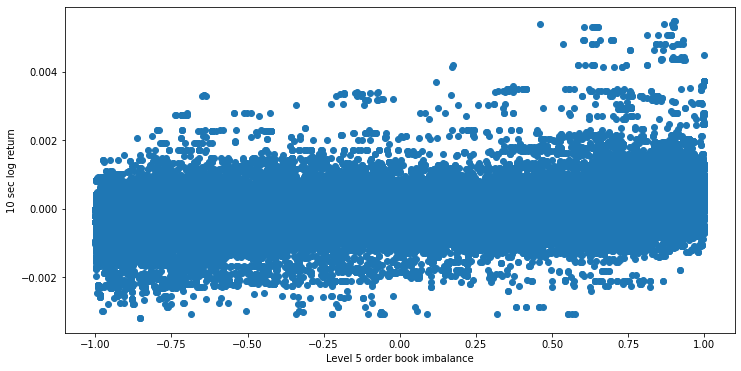

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(obi.level_5, long_return[f'log_10s'])
plt.xlabel('Level 5 order book imbalance')
plt.ylabel('10 sec log return')
plt.show()

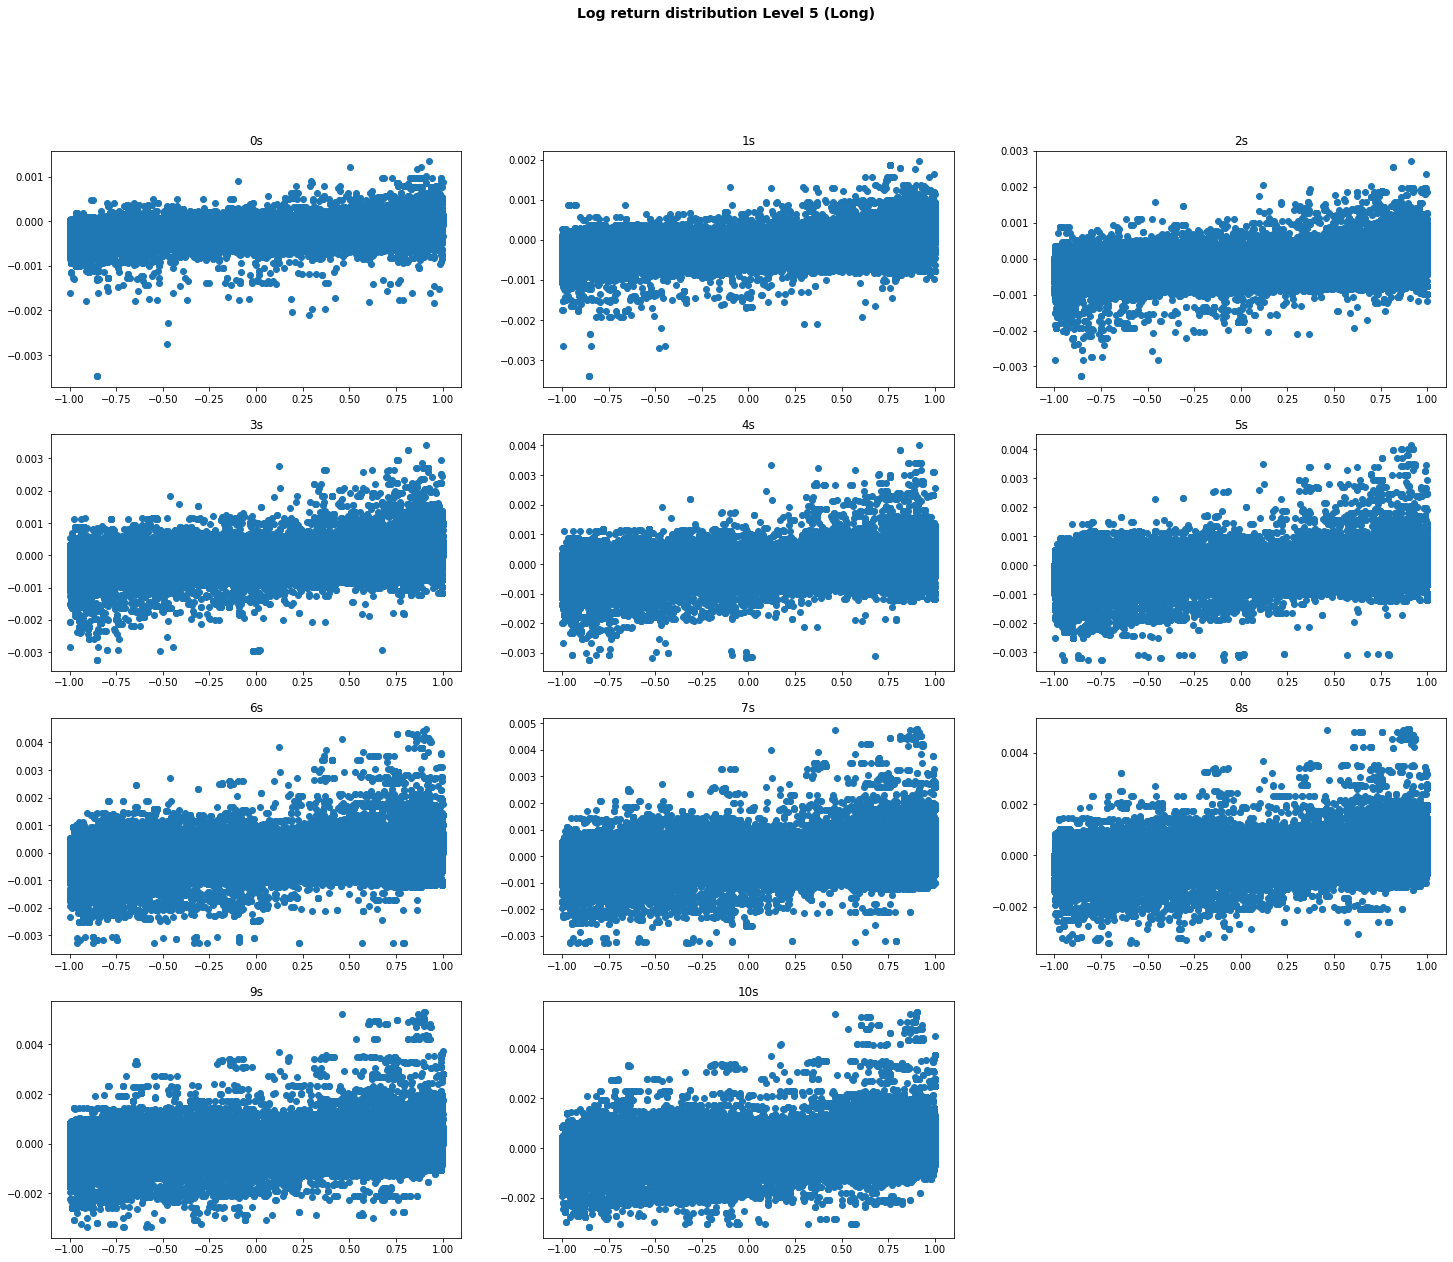

In [14]:
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Log return distribution Level 5 (Long)', fontsize=14, fontweight='bold')
for i in range(0,11):
  ax = fig.add_subplot(4, 3, i+1)
  ax.title.set_text(f'{i}s')
  ax.scatter(obi.level_5, long_return[f'log_{i}s'])
plt.show()

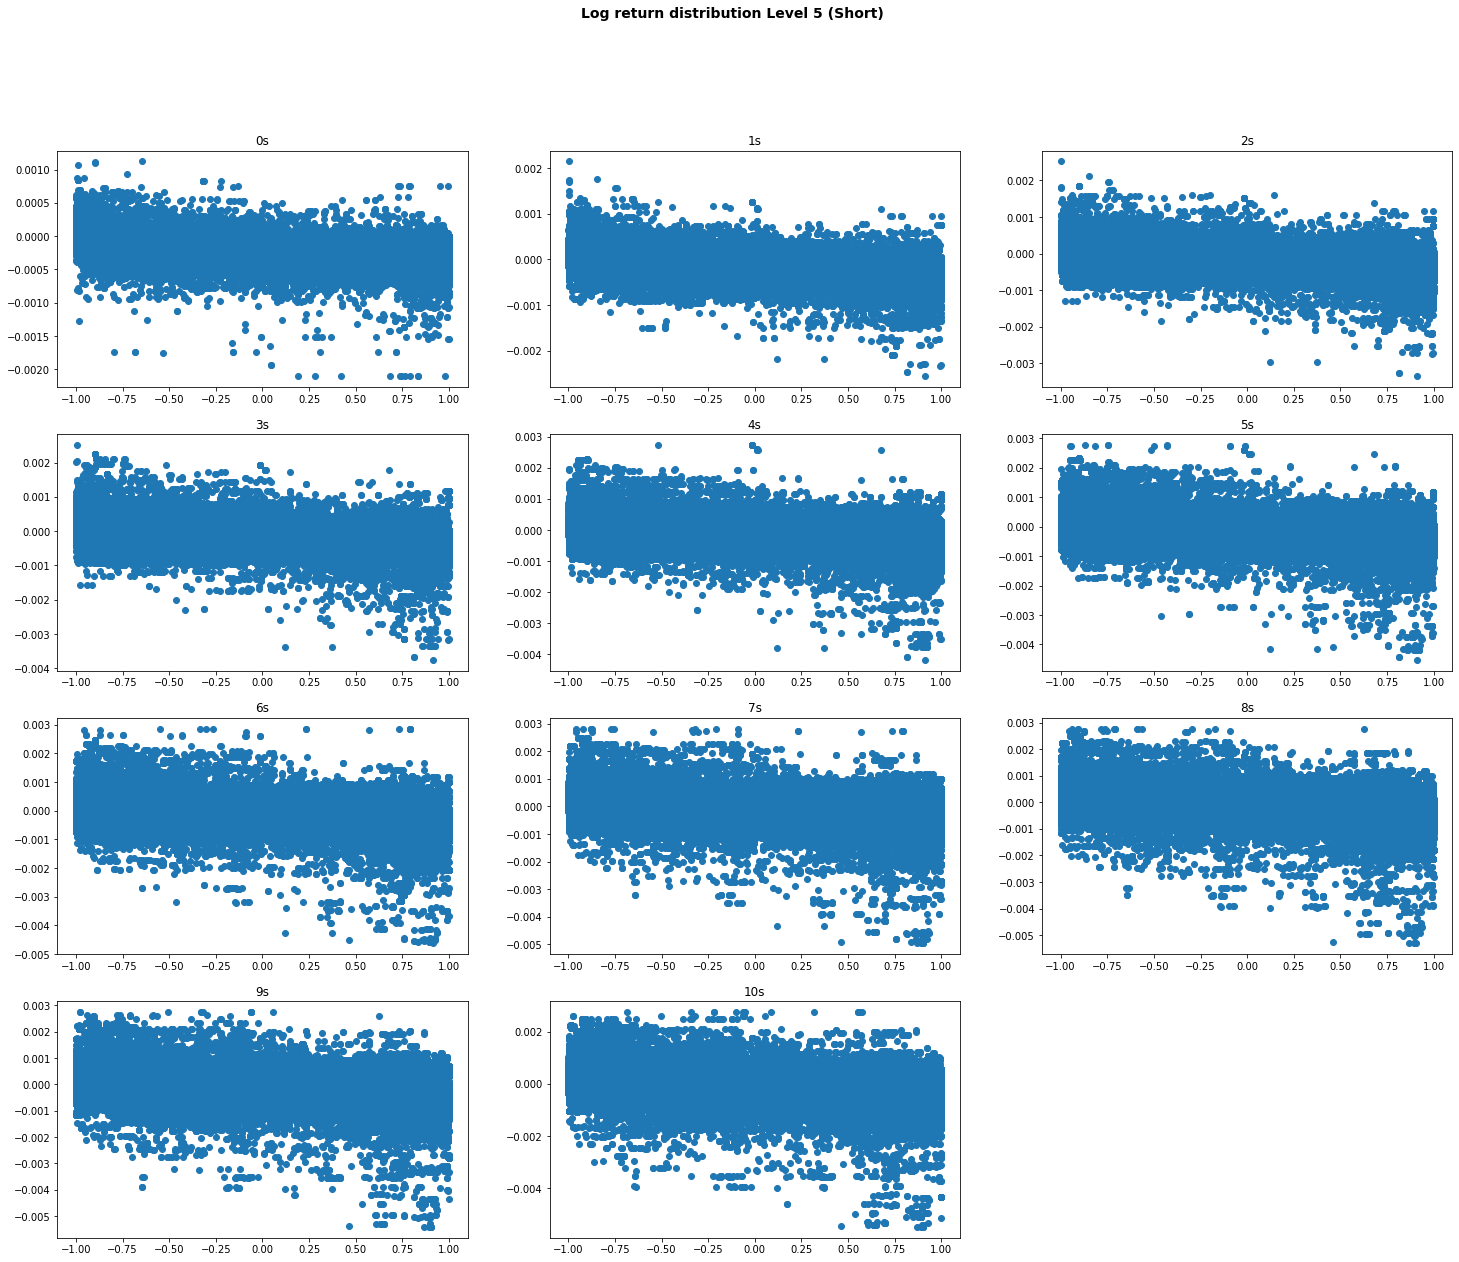

In [15]:
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Log return distribution Level 5 (Short)', fontsize=14, fontweight='bold')
for i in range(0,11):
  ax = fig.add_subplot(4, 3, i+1)
  ax.title.set_text(f'{i}s')
  ax.scatter(obi.level_5, short_return[f'log_{i}s'])
plt.show()

### Plot auto correlation

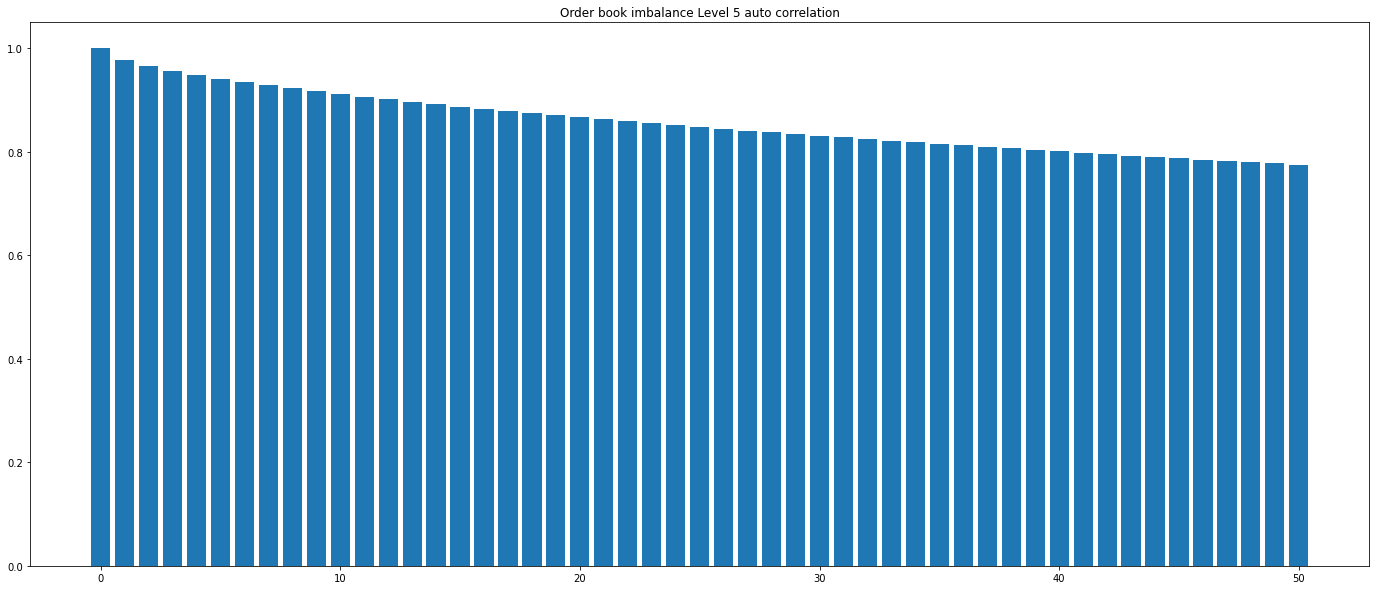

In [16]:
autocorr = []
rng = range(0,51)
for i in rng:
  autocorr.append(obi.level_5.autocorr(lag=i))


fig = plt.figure(figsize=(24, 10))
plt.title(f'Order book imbalance Level 5 auto correlation')
plt.bar(rng, autocorr)
plt.show()

### Regime classification

In [17]:
%%capture
for i in range(1,6):
  obi[f'lv_{i}_regime'] = 1
  for j in range(1,11):
    obi[f'lv_{i}_regime'][obi[f'level_{i}'] >= (-1.2 + (0.2 * j))] = j
  obi[f'lv_{i}_regime'][obi[f'level_{i}'] <= (-0.95)] = 0
  obi[f'lv_{i}_regime'][obi[f'level_{i}'] >= (0.95)] = 11

In [18]:
regime_return = obi[['lv_1_regime','lv_2_regime','lv_3_regime','lv_4_regime','lv_5_regime']]
regime_return = pd.merge(regime_return, long_return, how='left', on='timestamp')
groupby_return = regime_return.groupby(['lv_5_regime']).agg(['mean','std','min','max','sum'])

In [19]:
groupby_return

lv_1_regime                ...   log_10s                     
                   mean       std min  ...       min       max        sum
lv_5_regime                            ...                               
0              0.758020  1.647475   0  ... -0.002988  0.001437  -4.822283
1              4.100771  4.222933   0  ... -0.003183  0.004162 -17.713408
2              3.383833  3.481045   0  ... -0.003059  0.003325  -8.608849
3              4.206607  3.706505   0  ... -0.002988  0.002788  -6.285589
4              4.709609  3.702650   0  ... -0.003067  0.003304  -5.590514
5              5.381369  3.759723   0  ... -0.003067  0.003399  -5.283861
6              5.905472  3.672446   0  ... -0.003059  0.004203  -5.142337
7              6.450922  3.613283   0  ... -0.003059  0.003586  -4.674757
8              6.814206  3.654447   0  ... -0.003059  0.005401  -3.601252
9              7.799360  3.371684   0  ... -0.002384  0.005292  -1.509223
10             8.986981  2.796439   0  ... -0.002267  0.005466   3.153361
11            10.198439  1.625988   0  ... -0.001248  0.004489   4.614154

[12 rows x 75 columns]

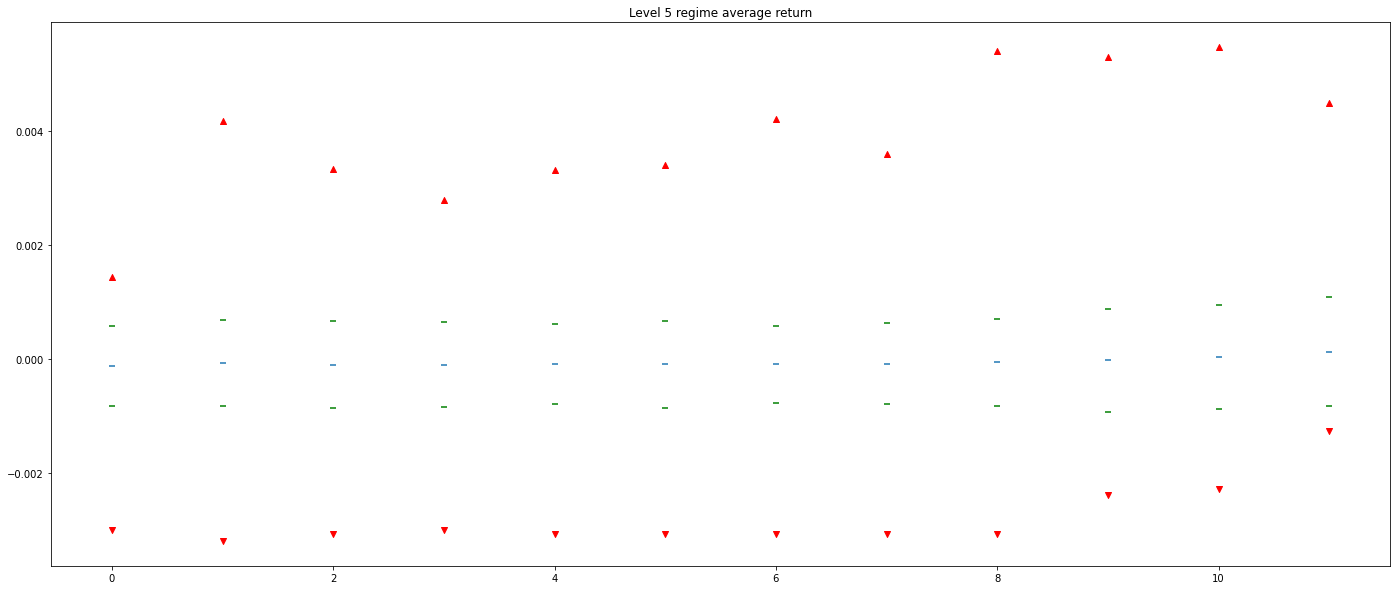

In [20]:
fig = plt.figure(figsize=(24, 10))
plt.title('Level 5 regime average return')
plt.scatter(range(0,12), groupby_return['log_10s']['max'], marker ='^', color = 'r')
plt.scatter(range(0,12), groupby_return['log_10s']['mean'], marker ='_')
plt.scatter(range(0,12), groupby_return['log_10s']['mean'] + 3 * groupby_return['log_10s']['std'], marker ='_', color = 'g')
plt.scatter(range(0,12), groupby_return['log_10s']['mean'] - 3 * groupby_return['log_10s']['std'], marker ='_', color = 'g')
plt.scatter(range(0,12), groupby_return['log_10s']['min'], marker ='v', color = 'r')
plt.show()

### Direction summary vs regime

In [21]:
%%capture
summary_direction = regime_return[['lv_5_regime']]
summary_direction['log_10s_group'] = 'neutral'
summary_direction['log_10s_group'][regime_return.log_10s > 0.0003] = 'up'
summary_direction['log_10s_group'][regime_return.log_10s < -0.0003] = 'down'

In [22]:
summary_direction

,lv_5_regime,log_10s_group
timestamp,,
2020-06-15 00:00:00.022,1,down
2020-06-15 00:00:01.801,1,down
2020-06-15 00:00:02.373,1,down
2020-06-15 00:00:02.746,1,down
2020-06-15 00:00:03.348,1,down
...,...,...
2020-06-15 23:59:59.588,7,neutral
2020-06-15 23:59:59.658,5,neutral
2020-06-15 23:59:59.742,5,neutral


In [23]:
summary = summary_direction.groupby(['lv_5_regime','log_10s_group']).size()

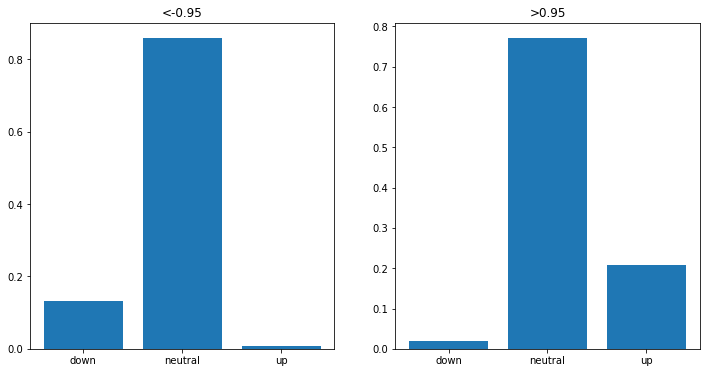

In [44]:
fig = plt.figure(figsize=(12, 6))
# fig.suptitle('Direction in Level 5 regime', fontsize=14, fontweight='bold')
labels = ['down','neutral','up']
x_pos = [i for i, _ in enumerate(labels)]

ax = fig.add_subplot(1, 2, 1)
ax.title.set_text(f'<-0.95')
ax.bar(x_pos, summary[0]/summary[0].sum())
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax = fig.add_subplot(1, 2, 2)
ax.title.set_text(f'>0.95')
ax.bar(x_pos, summary[11]/summary[11].sum())
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

plt.show()

In [45]:
summary[0]/summary[0].sum()

log_10s_group
down       0.132919
neutral    0.858432
up         0.008648
dtype: float64

In [46]:
summary[11]/summary[11].sum()

log_10s_group
down       0.020266
neutral    0.771016
up         0.208718
dtype: float64

In [42]:
x_pos

[0, 1, 2]

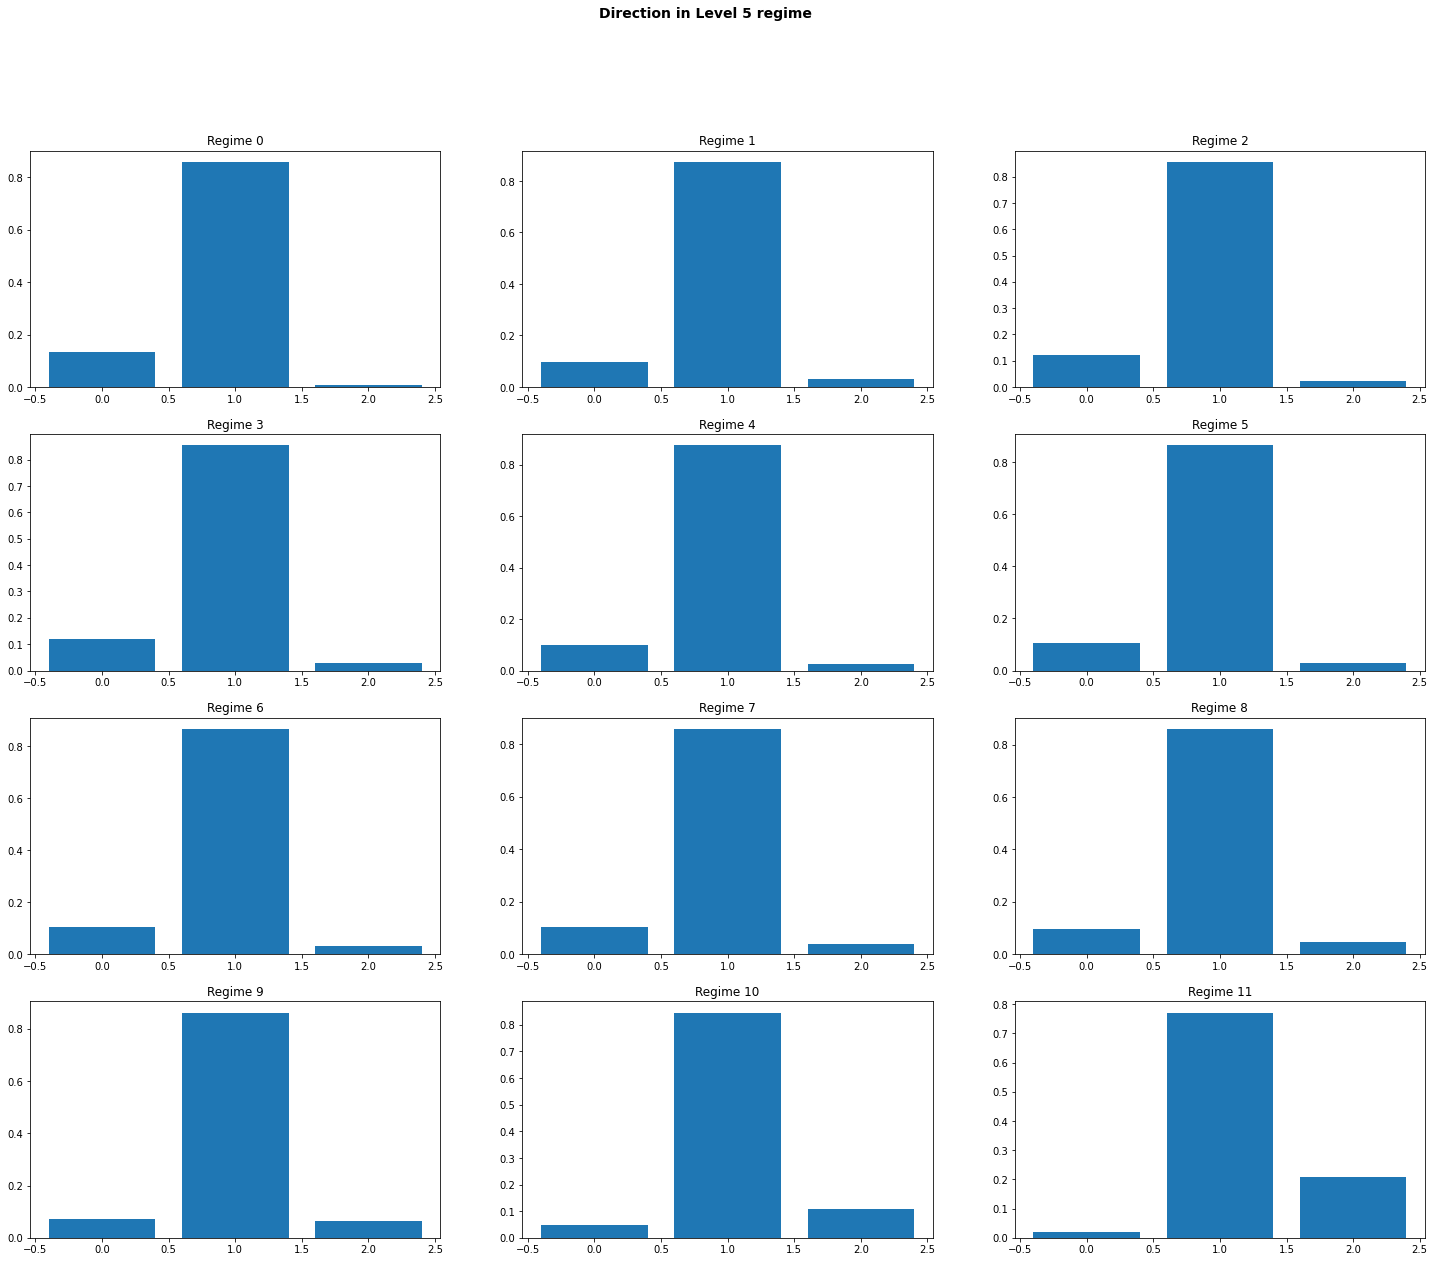

In [24]:
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Direction in Level 5 regime', fontsize=14, fontweight='bold')
x_pos = ['down','neutral','up']
x_pos = [i for i, _ in enumerate(x_pos)]

for i in range(0, 12):
  ax = fig.add_subplot(4, 3, i+1)
  ax.title.set_text(f'Regime {i}')
  ax.bar(x_pos, summary[i]/summary[i].sum())
plt.show()

In [25]:
temp_return = pd.DataFrame(data[['timestamp','ask_1_price']])
temp_return = temp_return.set_index(['timestamp'])
temp_return['timestamp_sec_ceil'] = temp_return.index.ceil(freq='1s') + timedelta(seconds=i)
temp_return = pd.merge(temp_return, price.bid_1_price, how='left', on='timestamp_sec_ceil')
temp_return = temp_return.replace(r'^\s*$', np.nan, regex=True)
temp_return = temp_return.fillna(method='ffill')
temp_return.index = data.index

In [26]:
obi2 = pd.DataFrame()
obi2[['time','level_1','level_2','level_3','level_4','level_5']] = obi[['timestamp','level_1','level_2','level_3','level_4','level_5']]
delay = obi2[['time']]
delay['time'] = delay.index - timedelta(milliseconds=1000)
delay = pd.merge_asof(delay, obi2, on='time', direction="backward")
delay.index = delay.time
delay['time'] = delay.index + timedelta(milliseconds=1000)
delay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,time,level_1,level_2,level_3,level_4,level_5
time,,,,,,
2020-06-15 00:00:00.022,2020-06-15 00:00:00.022,NaN,NaN,NaN,NaN,NaN
2020-06-15 00:00:01.801,2020-06-15 00:00:01.801,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.373,2020-06-15 00:00:02.373,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:02.746,2020-06-15 00:00:02.746,0.276303,NaN,NaN,NaN,NaN
2020-06-15 00:00:03.348,2020-06-15 00:00:03.348,-0.611101,-0.525535,0.394482,NaN,NaN
...,...,...,...,...,...,...
2020-06-15 23:59:59.588,2020-06-15 23:59:59.588,0.996832,0.995924,0.519931,0.230482,0.229453
2020-06-15 23:59:59.658,2020-06-15 23:59:59.658,0.996832,0.995865,0.517212,0.227219,0.227728
2020-06-15 23:59:59.742,2020-06-15 23:59:59.742,0.996832,0.995865,0.517212,0.227219,0.227728


In [27]:
book = pd.DataFrame(temp_return)
book['profit'] = 0
book['profit'][delay.level_5>=0.95] = book.bid_1_price - book.ask_1_price
book['cumsum_profit'] = book.profit.cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
book.iloc[10000,:]

ask_1_price                        9337.6
timestamp_sec_ceil    2020-06-15 00:13:17
bid_1_price                        9334.8
profit                                  0
cumsum_profit                     437.035
Name: 2020-06-15 00:13:05.333000, dtype: object

In [29]:
book.profit.sum()*0.005

209.49858270311375

In [30]:
book.to_csv('test.csv')